In [4]:
import numpy as np
import cvxpy as cp
import math
from scipy.optimize import fmin

times = [1900, 1910, 1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
times = [i for i in range(12)]
b = [75.995, 91.972, 105.711, 123.203, 131.669, 150.697, 179.323, 203.212, 226.505, 
249.633, 281.422, 308.746]

times = np.array(times)
b = np.array(b)

print("-------")
print("Problem 1")
print()

def A(T,N):
    A = [[t**i for i in range(N)] for t in T]
    return np.array(A)

print("1-Norm")
for n in range(1,12):
    B = A(times,n)
    x = cp.Variable(n)
    
    cost = cp.norm(B@x - b, p=1)
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()

    print(str(n-1) + ":  1-Norm: " + str(round(cp.norm(B@x - b,p=1).value,3)) + " --- 2-Norm: " + str(round(cp.norm(B@x - b,p=2).value,3)))

print()
print("Inf-Norm")
for n in range(1,12):
    B = A(times,n)
    x = cp.Variable(n)
    
    cost = cp.norm(B@x - b, p="inf")
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()

    print(str(n-1) + ":  inf-Norm: " + str(round(cp.norm(B@x - b,p="inf").value,3)) + " --- 2-Norm: " + str(round(cp.norm(B@x - b,p=2).value,3)))

-------
Problem 1

1-Norm
0:  1-Norm: 769.594 --- 2-Norm: 256.614
1:  1-Norm: 98.87 --- 2-Norm: 35.775
2:  1-Norm: 26.2 --- 2-Norm: 11.835
3:  1-Norm: 25.894 --- 2-Norm: 12.211
4:  1-Norm: 22.851 --- 2-Norm: 9.859
5:  1-Norm: 21.291 --- 2-Norm: 10.208
6:  1-Norm: 21.164 --- 2-Norm: 10.934
7:  1-Norm: 10.689 --- 2-Norm: 6.597
8:  1-Norm: 8.476 --- 2-Norm: 5.935
9:  1-Norm: 7.638 --- 2-Norm: 5.41
10:  1-Norm: 1.634 --- 2-Norm: 1.634

Inf-Norm
0:  inf-Norm: 116.376 --- 2-Norm: 259.892
1:  inf-Norm: 15.547 --- 2-Norm: 34.865
2:  inf-Norm: 4.247 --- 2-Norm: 11.039
3:  inf-Norm: 4.223 --- 2-Norm: 11.437
4:  inf-Norm: 3.741 --- 2-Norm: 10.447
5:  inf-Norm: 3.078 --- 2-Norm: 9.471
6:  inf-Norm: 2.953 --- 2-Norm: 9.369
7:  inf-Norm: 2.249 --- 2-Norm: 7.224
8:  inf-Norm: 1.797 --- 2-Norm: 5.731
9:  inf-Norm: 1.455 --- 2-Norm: 4.607
10:  inf-Norm: 0.424 --- 2-Norm: 1.403


Description (for the work above): The 1 and infinity norms follow the 2-norm error closely. The lowest error was at degree 10 (which is to be expected) for all 3 norms.


Part C: Leave-One-Out Error


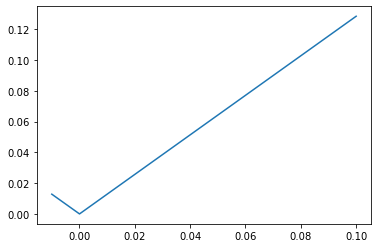

In [33]:
from scipy.optimize import minimize, root
import matplotlib.pyplot as plt

print()
print("Part C: Leave-One-Out Error")

times = [1900, 1910, 1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
times = [i for i in range(12)]
b = [75.995, 91.972, 105.711, 123.203, 131.669, 150.697, 179.323, 203.212, 226.505, 
249.633, 281.422, 308.746]
x_vals = []

for d in range(len(b)):
    times = [times[i] if i != d else 0 for i in range(12)]
    b = [b[i] if i != d else 0 for i in range(12)]
    
    B = A(times,12)
    x = cp.Variable(12)
    cost = cp.norm(B@x - b, p="inf")
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()

    x_vals.append(x.value)


l_vals = np.linspace(-0.01, 0.1,2000)
n_vals = []
for l in l_vals:
    n = 0
    for x in x_vals:
        n += abs(np.linalg.norm(B@x-b, ord=2)**2 + l*np.linalg.norm(x,ord=1))
    n_vals.append(n/2000)

plt.plot(l_vals,n_vals)

In [14]:
from scipy.optimize import minimize, root


print("-------")
print("Problem 2, Part a")
print()

def f(theta):
    x_1 = theta[0]*theta[2] + theta[1]*u[0]
    x_2 = theta[0]*x_1 + theta[1]*u[1]
    x_3 = theta[0]*x_2 + theta[1]*u[2]
    x_4 = theta[0]*x_3 + theta[1]*u[3]
    x = np.array([x_1-y[0],x_2-y[1],x_3-y[2],x_4-y[3]])
    
    return np.linalg.norm(x)


u = np.array([5, 2, 0, 1])
y  = np.array([10.5, 9.5, 4.51, 4.3])

theta = minimize(f,[1,1,1],method='powell')
print(theta)

-------
Problem 2, Part a

   direc: array([[-2.70827464e-01,  4.05727538e-01,  1.01960361e+00],
       [-4.80805233e-02,  4.79662872e-01, -4.97176916e+00],
       [-4.58989348e-04,  3.68191841e-03, -5.43423745e-02]])
     fun: 0.08055433729963207
 message: 'Optimization terminated successfully.'
    nfev: 251
     nit: 6
  status: 0
 success: True
       x: array([ 0.47378861,  2.24119794, -1.45718831])


From above yields values:

a = 0.474

b = 2.24

x_0 = -1.457

In [10]:
from scipy.optimize import least_squares

print("-------")
print("Problem 3, Part c")
print()

import scipy.linalg as spla
from scipy.optimize import minimize, root

y = np.array([[88.35, 7.3, 2.3, 0.4, 1.75], 
[76.4, 15.6, 4.5, 0.7, 2.8], 
[65.1, 23.1, 5.3, 1.1, 5.8], 
[50.4, 32.9, 6.0, 1.5, 9.3], 
[37.5, 42.7, 6.0, 1.9, 12.0], 
[25.9, 49.1, 5.9, 2.2, 17.0], 
[14.0, 57.4, 5.1, 2.6, 21.0], 
[4.5, 63.1, 3.8, 2.9, 25.7]])
t = [1230.0, 3060.0, 4920.0, 7800.0, 10680.0, 15030.0, 22620.0, 36420.0]
x_0 = np.array([100,0,0,0,0])

def A_matrix(theta):
    A = [[-1*(theta[0] + theta[1]),0,0,0,0], 
    [theta[0], 0,0,0,0],
    [theta[1], 0,-1*(theta[2]+theta[3]),0,theta[4]],
    [0,0, theta[2],0,0],
    [0,0,theta[3],0,-1*theta[4]]]
    return np.array(A)

def exp(theta):
    phi = np.array([spla.expm(A_matrix(theta) * t_i) for t_i in t])
    g = np.array([(p@x_0) for p in phi])
    C = [np.linalg.norm([y[i][j] - g[i][j] for i in range(len(g))],ord=2) for j in range(len(g[0]))]
    return C

least_squares(exp, x_0, method="lm")



-------
Problem 3, Part c



C:\Users\davee\AppData\Local\Temp\ipykernel_2208\3975664844.py:31: RuntimeWarning: invalid value encountered in matmul
  g = np.array([(p@x_0) for p in phi])


 active_mask: array([0, 0, 0, 0, 0])
        cost: 26451.25794823645
         fun: array([150.71218431, 171.65570494,  10.97269659,  16.45682041,
        18.20564063])
        grad: array([    60.66388159,   -969.03103578, -15578.03840278, -20613.32322988,
        30061.29259625])
         jac: array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.29129554e-01, -5.25744052e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-4.27625994e-02,  6.83083061e-01,  9.03915766e+03,
         4.18782425e+04, -2.49437528e+05],
       [-2.34035843e-01,  3.73843799e+00, -2.09313166e+05,
        -1.19230263e+05,  2.15028329e+05],
       [ 4.66208418e-01, -7.44711188e+00,  1.82903051e+05,
         8.14044661e+04, -4.23835118e+04]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 85
        njev: None
  optimality: 30061.292596247047
      status: 3
     success: True
           x: array([ 4.530601

Unfortunately I could not get the method above to work properly. I tried many, many different approaches with both cvxpy and scipy. I do believe the idea is formulated correctly.

In [9]:
print("-------")
print("Problem 6")
print()

# set up function and data
f = lambda t: math.exp(-1*t)
alt_f = lambda t: math.sin(12*t)
t = np.random.uniform(-1,1,25)
# partition data into training and validation sets
ry = [f(t[i]) for i in range(25)]

def A(times,m2=2,m1=0):
    B =  [[t**i for i in range(m1,m2)] for t in times]
    return np.array(B)

def bias(x_hat, x):
    return np.mean(x_hat-x,axis=0)

def exp_error(x_hat,x):
    return np.mean((x-x_hat)**2, axis=0)


for N in range(1,21):
    train_error = 0
    test_error = 0
    errors = []
    bias_squared = 0

    for k in range(1000):
        e = np.random.normal(0,.1,25)
        y = [f(t[i]) + e[i] for i in range(25)]
        y_train, y_test = y[:20], y[20:]
        t_train, t_test = t[:20], t[20:]

        B_train = A(t_train,N)
        theta, err = np.linalg.lstsq(B_train,y_train, rcond=1)[:2]

        B_test = A(t_test, N)
        train_error += np.linalg.norm(B_train@theta - y_train)

        pred_val = B_test@theta
        test_error += np.linalg.norm(pred_val - y_test)
        errors.append(test_error)

        bias_squared += bias(pred_val, ry[20:])**2

    print(str(N-1) + ": Train Error: " + str(round(train_error/1000,4)) + " --- Test Error: " + str(round(test_error/1000,4)))
    print("Bias Squared: ", bias_squared/1000)
    print("Variance: ", np.std(pred_val))


-------
Problem 6

0: Train Error: 2.7274 --- Test Error: 1.2401
Bias Squared:  0.19801549601093224
Variance:  0.0
1: Train Error: 0.6585 --- Test Error: 0.2976
Bias Squared:  0.001163304189508706
Variance:  0.3963088320289178
2: Train Error: 0.4158 --- Test Error: 0.2298
Bias Squared:  0.0007919537997041267
Variance:  0.3371060043919306
3: Train Error: 0.3952 --- Test Error: 0.2384
Bias Squared:  0.0007828596560050898
Variance:  0.3247330664855823
4: Train Error: 0.3805 --- Test Error: 0.2301
Bias Squared:  0.0009471387670305198
Variance:  0.3142158502235272
5: Train Error: 0.3638 --- Test Error: 0.2424
Bias Squared:  0.0010864864889515726
Variance:  0.3136025367619151
6: Train Error: 0.3554 --- Test Error: 0.2571
Bias Squared:  0.0011387237654304086
Variance:  0.3483651399929112
7: Train Error: 0.3408 --- Test Error: 0.2786
Bias Squared:  0.0014420598716243856
Variance:  0.37932627494009286
8: Train Error: 0.3297 --- Test Error: 0.291
Bias Squared:  0.0017546085163993293
Variance:  0